# Quantization

## [(Scalar) Quantization](https://en.wikipedia.org/wiki/Quantization\_\(signal\_processing\)
* Let:

  \begin{equation}
    s_s(t)=s(nT_s),
  \end{equation}
  
  where $n\in{\mathbb{Z}}$ and $T_s$ is the sampling frequency in Hertzs.
  
* Quantizers discretize the amplitude of a [PAM signal](https://en.wikipedia.org/wiki/Pulse-amplitude_modulation) $s(nT_s)$, producing a [PCM signal](https://en.wikipedia.org/wiki/Pulse-code_modulation) and a loss of information.

* The quantization process can be modeled as

\begin{equation}
  s[n] = s(nT_s) + e(nT_s),
\end{equation}

being $s[n]$ the the quantized signal and $e(nT_s)$ the quantization error.

* Depending on the number of $Q$ different possible values (or *bins*) for $s[]$, we speak of a $q=\lceil\log_2(Q)\rceil$-bits quantizer (this means that the output of the quantizer are $q$ bits for each sample, or that we have $2^q$ representation levels).

## Uniform (lineal) quantization

* All quantizers are defined from their set of $d_i; i\in {\mathbb{Z}}$ (decision levels) and $r_i; i\in {\mathbb{Z}}$ (representation levels). In a linear quantizer, the quantization step $\Delta$ satisfies that

  \begin{equation}
    \Delta=d_{i+1}-d_i=r_{i+1}-r_i.
  \end{equation}
  
  Notice that, for a given dynamic range of $s$, $Q$ is inversely proportional to $\Delta$, and viceversa.
  
* In uniform quantizers, $\Delta$ does not depends on the PAM sample values.

  <img src="graphics/lineal_quantization.svg" width=600>

  Notice that in this quantizer, $e(nTs)_\text{max}=\frac{\Delta}{2}$. This is a $q=\lceil\log_2(5)\rceil=3$-bits quantizer ($Q=8$).

* Uniform quantizers are used in most A/D (analogic/digital) converters, were it is expected the generation of uniformely distributed sequences of samples.

## Example (uniform quantization)

In [3]:
from IPython.display import display, Math, Latex
display(Math(r's(nT_s)~~\lceil s(nT_s)/\Delta\rceil ~~s[n]=\Delta\times\lceil s(nT_s)/\Delta\rceil~~e(nT_s)=s(nT_s)-s[n]'))
for i in range(-16,16):
    sample = i
    quantized_sample = (i//2)*2+0.5
    quantization_error = sample - quantized_sample
    print("{:+4d}     {:+3d}           {:>+5}                    {:>+4}".\
          format(sample, i//2, quantized_sample, quantization_error))
display(Math(r'\text{In this example}, \Delta=2.0.~\text{Therefore, for the defined input range}~[-16.0,15.0],\
        \text{this is a}~q=4\text{-bits quantizer}~(Q=16).'))

<IPython.core.display.Math object>

 -16      -8           -15.5                    -0.5
 -15      -8           -15.5                    +0.5
 -14      -7           -13.5                    -0.5
 -13      -7           -13.5                    +0.5
 -12      -6           -11.5                    -0.5
 -11      -6           -11.5                    +0.5
 -10      -5            -9.5                    -0.5
  -9      -5            -9.5                    +0.5
  -8      -4            -7.5                    -0.5
  -7      -4            -7.5                    +0.5
  -6      -3            -5.5                    -0.5
  -5      -3            -5.5                    +0.5
  -4      -2            -3.5                    -0.5
  -3      -2            -3.5                    +0.5
  -2      -1            -1.5                    -0.5
  -1      -1            -1.5                    +0.5
  +0      +0            +0.5                    -0.5
  +1      +0            +0.5                    +0.5
  +2      +1            +2.5                  

<IPython.core.display.Math object>

## Quantization + Encoding

* When we quantize digital signals, these are sequences of digital samples represented by symbols of a given alphabet, typically, a subset of ${\mathbb{Z}}$ or ${\mathbb{N}}$. Therefore, both the input and the output of the quantizer are indexes, not real values of a sampled signal.
* Therefore, in this context, $\Delta$ represents the length of the intervals of indexes what will be ignored.

## Example

Quantize [Jfk_berlin_address_high.ogg](https://upload.wikimedia.org/wikipedia/commons/3/3a/Jfk_berlin_address_high.ogg) using $\Delta=2$. Compute the variance of both audio sequences.

## Non-uniform quantization

* In order to minimize the maximun, average or the total quantization error, $\Delta$ can be adapted to the characteristics of $s$.

## Companded quantization

* Non-uniform quantizer.

* [Companding](https://en.wikipedia.org/wiki/Companding): COMpressing + exPANDING. The original signal is mapped through a compressor, quantized using an uniform quantized, and re-mapped using the corresponding expander. The result is a logarithmic quantization.

* [$\mu$-law](https://en.wikipedia.org/wiki/%CE%9C-law_algorithm) example:

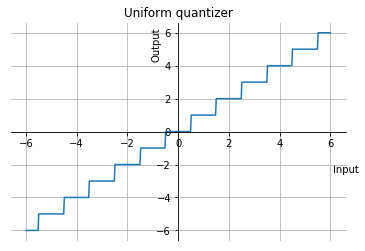

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

fig = plt.figure()
x = np.linspace(-6, 6, 500)
y = np.round(x)

ax = fig.add_subplot(111)
ax.set_title('Uniform (midtread) quantizer')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_label_coords(1,0.35)
ax.xaxis.set_label_text('Input')
ax.yaxis.set_label_coords(0.45,.9)
ax.yaxis.set_label_text('Output')
ax.grid()
ax.plot(x, y)

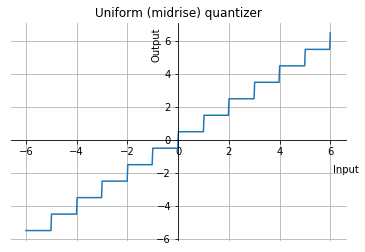

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

fig = plt.figure()
x = np.linspace(-6, 6, 500)
y = np.floor(x)+0.5

ax = fig.add_subplot(111)
ax.set_title('Uniform (midrise) quantizer')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_label_coords(1,0.35)
ax.xaxis.set_label_text('Input')
ax.yaxis.set_label_coords(0.45,.9)
ax.yaxis.set_label_text('Output')
ax.grid()
ax.plot(x, y)

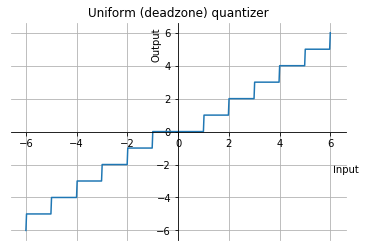

In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

fig = plt.figure()
x = np.linspace(-6, 6, 500)
y = x.astype(np.int)

ax = fig.add_subplot(111)
ax.set_title('Uniform (deadzone) quantizer')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_label_coords(1,0.35)
ax.xaxis.set_label_text('Input')
ax.yaxis.set_label_coords(0.45,.9)
ax.yaxis.set_label_text('Output')
ax.grid()
ax.plot(x, y)

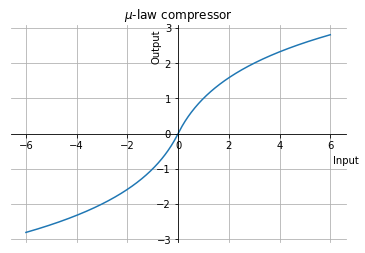

In [72]:
%matplotlib inline

import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

fig = plt.figure()
x = np.linspace(-6, 6, 500)
mu = 1.0
x_max = 1.0
y = x_max*np.log(1+mu*np.abs(x)/x_max)/np.log(1+mu)*np.sign(x)

ax = fig.add_subplot(111)
ax.set_title('$\mu$-law compressor')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_label_coords(1,0.40)
ax.xaxis.set_label_text('Input')
ax.yaxis.set_label_coords(0.45,.9)
ax.yaxis.set_label_text('Output')
ax.grid()
ax.plot(x, y)

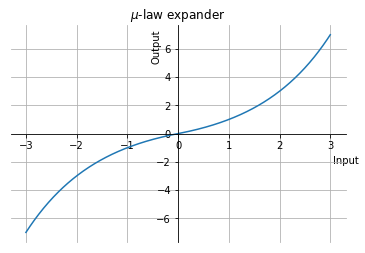

In [77]:
%matplotlib inline

import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

fig = plt.figure()
x = np.linspace(-3, 3, 500)
mu = 1.0
x_max = 1.0
y = (x_max/mu)*((1+mu)**(np.abs(x)/x_max)-1)*np.sign(x)

ax = fig.add_subplot(111)
ax.set_title('$\mu$-law expander')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_label_coords(1,0.40)
ax.xaxis.set_label_text('Input')
ax.yaxis.set_label_coords(0.45,.9)
ax.yaxis.set_label_text('Output')
ax.grid()
ax.plot(x, y)

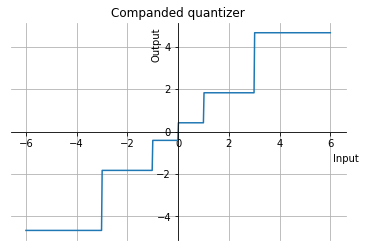

In [96]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

fig = plt.figure()
x = np.linspace(-6, 6, 500)
mu = 1.0
x_max = 1.0
_y = np.floor(x_max*np.log(1+mu*np.abs(x)/x_max)/np.log(1+mu)*np.sign(x))+0.5
y = (x_max/mu)*((1+mu)**(np.abs(_y)/x_max)-1)*np.sign(_y)

ax = fig.add_subplot(111)
ax.set_title('Companded quantizer')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_label_coords(1,0.40)
ax.xaxis.set_label_text('Input')
ax.yaxis.set_label_coords(0.45,.9)
ax.yaxis.set_label_text('Output')
ax.grid()
ax.plot(x, y)

## PDF-optimized quantization

* Non-uniform quantizer.

* if we known the probability distribution of the samples, we can select a small $\Delta$ for the most probable samples and viceversa. 

<img src="data/cuantif_max-lloyd.png" width=600>

## Adaptive quantization

* Useful when the characteristics of $s$ (the variance, for example) vary over time.

* Typically, the quantizer varies $\Delta$ depending on such characteristics.

## Forward adaptive quantization

* Used for determining a suitable $\Delta$ for blocks of samples.

* ### Encoder:

    1. While samples in $s$:
        1. Read into $b$ the next $B$ samples of $s$.
        2. Determine $\Delta$, minimizing the quantization error, and output $\Delta$ (or the data necessary for its determination).
        3. Quantize $b$ and output it.

* ### Decoder:

    1. While data in input:
        1. Read $\Delta$ (or the data necessary for determining it, and in this case, use the same algorithm that the used by the encoder).
        2. "Dequantize" $b$ and output it (note that the dequantization is only a way of calling the process of reverting the original range of the quantized signal).

* The selection of $B$ is a trade-off between the increase in side information needed by small block sizes and the loss of fidelity due to large block sizes.

* Forward adaptive quantization generates a $B\text{-samples}\times f_s$ delay (buffering), where $f_s$ is the sampling rate of $s$.

## Backward adaptive quantization

* Only the previously quantized samples are available to use in adapting the quantizer.

* Idea: If happens that $\Delta$ is smaller than it should be, the input will fall in the outer levels of the quantizer a high number of times. On the other hand, if $\Delta$ is larger than it should be, the samples will fall in the inner levels a high number of times.

* ### Encoder:

    1. $\Delta\leftarrow 2$.
    2. While $s$ is not exhausted:
        1. Quantize the next sample.
        2. Observe the output and refine $\Delta$. 
        
* ### Decoder:

    1. $\Delta\leftarrow 2$.
    2. While $\hat{s}$ is not exhausted:
        1. "Dequantize" the next sample.
        2. Step 2.B of the encoder.

## The Jayant quantizer  [[Jayant, 1974]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=%22Digital+coding+of+speech+waveforms%3A+PCM%2C+DPCM%2C+and+DM+quantizers%22&btnG=)

* Adaptive quantization with a one word memory ($\Delta_{(t-1)}$).

* A Jayant quantider defines the Step 2.B. as: Define a multiplier $M_l$ for each quantization level $l$, where for the inner levels $M_l<1$ and for the outer levels $M_l>1$, and compute:

  $$
    \Delta^{[n]} = \Delta^{[n-1]}{M_l}^{[n-1]},
  $$

  where $\Delta^{[n-1]}$ was the previous quantization step and ${M_l}^{[n-1]}$ the level multiplier for the $n-1$-th (previous) sample. Thus, if the previous ($n-1$) quantization used a $\Delta^{[n-1]}$ too small (using outer quantization levels) then $\Delta^{[n]}$ will be larger and viceversa.

* Depending on the multipliers $M$, the quantizer will converge or oscillate. In the first case, the quantizer will be good for small variations of $s$ but bad when a fast adaption to large changes in $s$ is required. In the second one, the quantizer will adapt quickly to fast variations of $s$ but will oscillate when $s$ changles slowly.

* Most Jayant quantizers clip the computation of $\Delta$ to avoid generating a zero output quantizer in those contexts where $s$ is zero or very close to zero, and to improve the adaptation to smaller samples after a sequence of bigger ones (avoiding to grow without limit):

  $$
  \begin{array}{ll}
    \text{if}~\Delta^{[n]}<\Delta_\text{min}~\text{then}~\Delta^{[n]} = \Delta_\text{min},\\
    \text{if}~\Delta^{[n]}>\Delta_\text{max}~\text{then}~\Delta^{[n]} = \Delta_\text{max}.
  \end{array}
  $$

## Adapting with a scale factor

* A Jayant quantized adapts the quantization step to the dynamic range of the signa using a set of multipiers. A similar effect can be provided by dividing the input signal by a scale factor defined iteratively as:

  \begin{equation}
    \alpha^{[n]} = \alpha^{[n-1]}M_l^{[n-1]}.
  \end{equation}

## Example

Quantize [Jfk_berlin_address_high.ogg](https://upload.wikimedia.org/wikipedia/commons/3/3a/Jfk_berlin_address_high.ogg) using $4$-bits backward adaptive Jayant quantizer. Reproduce the quantized sequence and provide a subjective comparison with the original sequence.